# Comparison of taxa and period of building origin 

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import husl
from legendgram import legendgram
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap
from shapely.geometry import Point

from tqdm import tqdm
from download import download

In [2]:
clusters = pd.read_csv('prg_cluster_labels_10.csv', index_col=0)

In [4]:
clusters

cluster     uID
0             0       0
1             7       1
2             5       2
3             5       3
4             3       4
...         ...     ...
140310        7  140457
140311        5  140458
140312        6  140459
140313        6  140460
140314        2  140461

[140315 rows x 2 columns]

In [6]:
years_path = download("https://www.dropbox.com/s/roa601e2ci4a30c/origin_year.csv?dl=1", "origin_year.csv")

Successfully downloaded file to origin_year.csv


In [3]:
years = pd.read_csv('origin_year.csv', index_col=0)

In [4]:
years['year'] = pd.Categorical(years['ROK_PUVODNI'], 
                               categories=[1840, 1880, 1920, 1950, 1970, 1990, 2012],
                               ordered=True)

In [5]:
joined = clusters.merge(years[['uID', 'year']], on='uID', how='left')

In [10]:
joined.head(4)

cluster  uID  year
0        0    0  1990
1        7    1  1840
2        5    2  1970
3        5    3  1950

In [11]:
geom_path = download("https://www.dropbox.com/s/pnapb1egu6l8ds8/geometry.gpkg?dl=1", "geometry.gpkg")

Successfully downloaded file to geometry.gpkg


In [6]:
buildings = gpd.read_file('geometry.gpkg', layer='buildings')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [7]:
buildings = buildings.merge(joined, on='uID', how='left')

In [14]:
buildings.year.unique()

[1990, 1840, 1970, 1950, NaN, 1920, 2012, 1880]
Categories (7, int64): [1840 < 1880 < 1920 < 1950 < 1970 < 1990 < 2012]

# plot

In [12]:
def north_arrow(f, ax, rotation=0, loc=2, legend_size=(.1,.1), frameon=False, thick=.1, outline=3, edgecolor='k', facecolor='k'):
    from legendgram.util import make_location
    from matplotlib.transforms import Affine2D
    
    arrpos = make_location(ax, loc, legend_size=legend_size)
    arrax = f.add_axes(arrpos)

    circle = plt.Circle((0, 0), radius=1, edgecolor=edgecolor, facecolor='w', linewidth=outline)
    arrax.add_patch(circle)

    rectangle = plt.Rectangle((-0.05, 0), thick, 1, facecolor=facecolor)
    t = Affine2D().rotate_deg(rotation) + arrax.transData
    rectangle.set_transform(t)
    arrax.add_patch(rectangle)
    arrax.axis('scaled')
    arrax.set_frame_on(frameon)
    arrax.get_yaxis().set_visible(False)
    arrax.get_xaxis().set_visible(False)
    return arrax

In [6]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
cols = [husl.husl_to_hex(*color) for color in colors]
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))    
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,31.25)

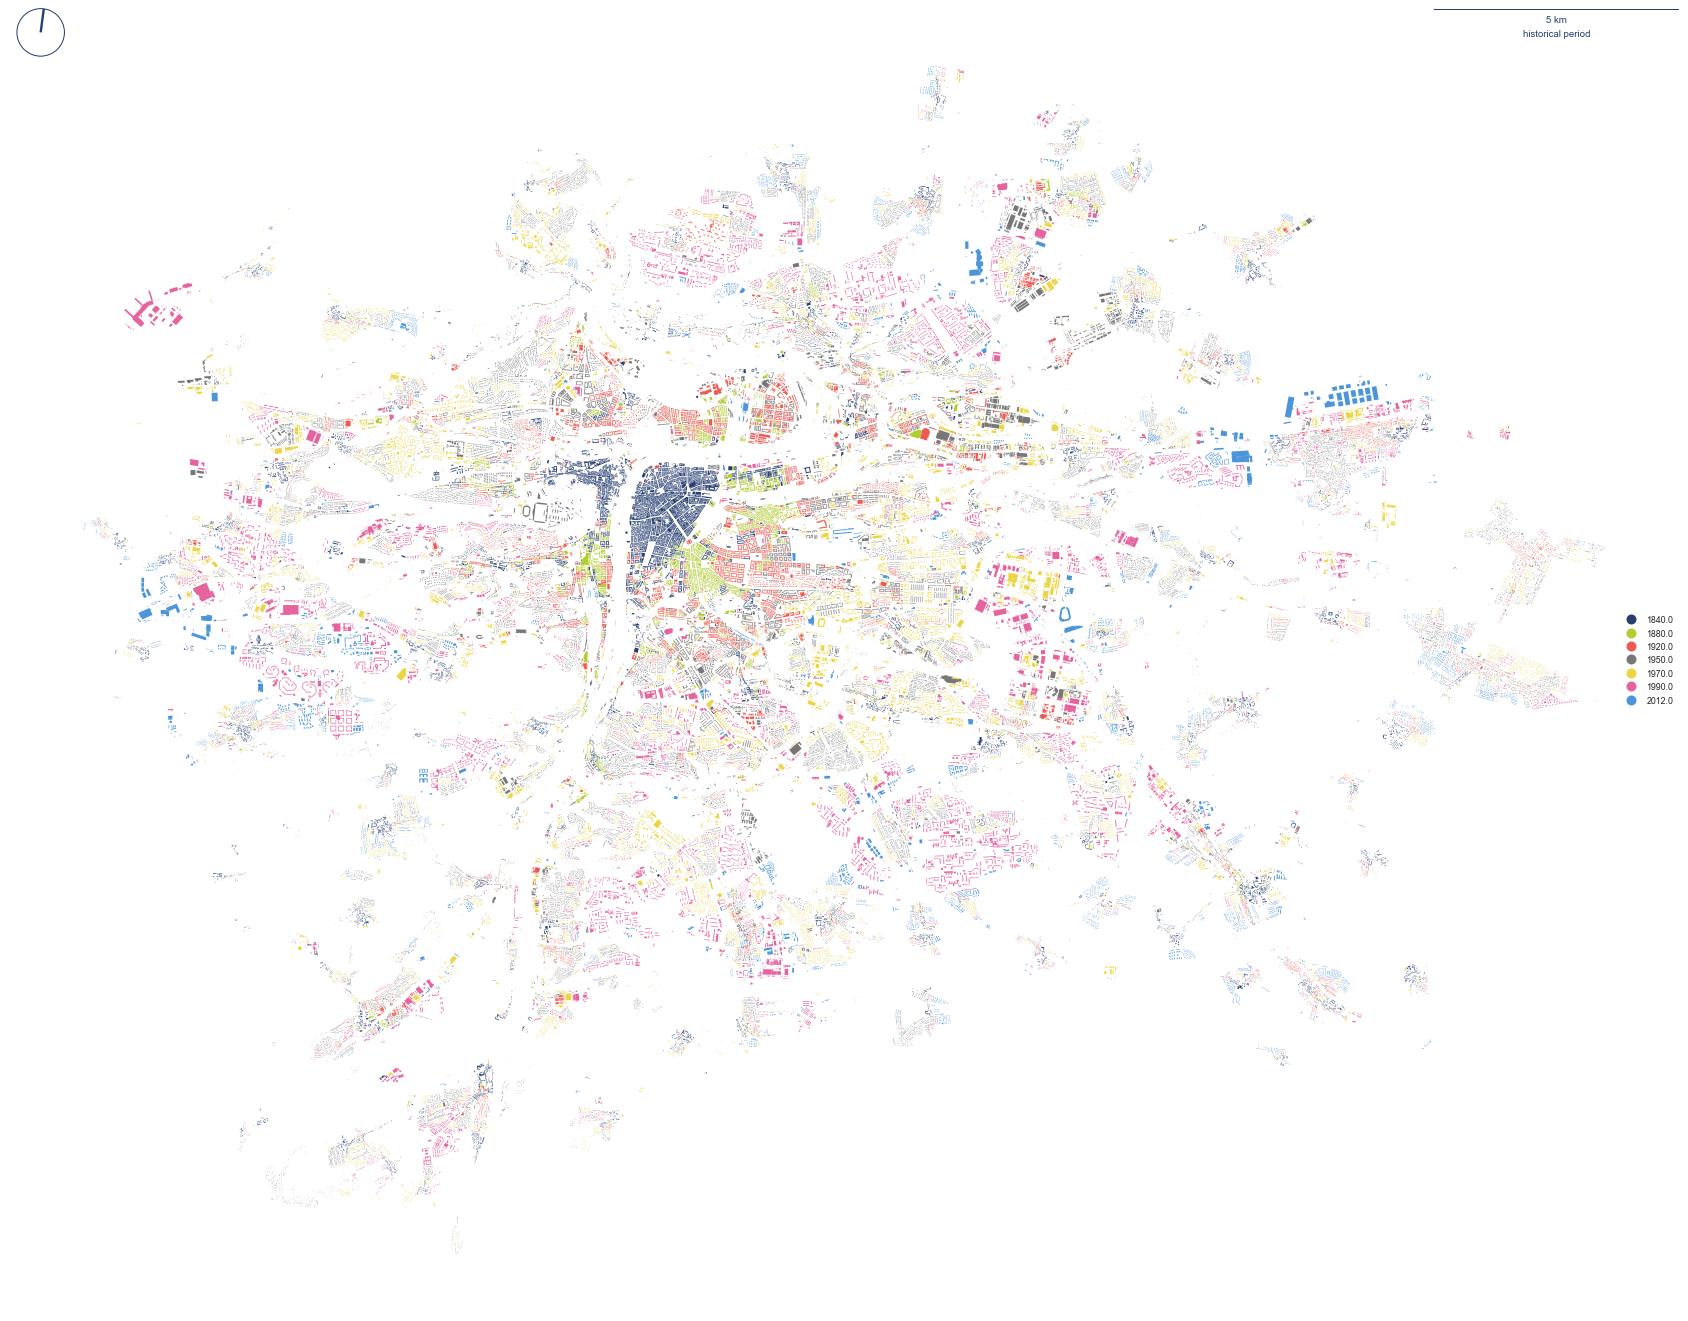

In [217]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
color = (257, 71, 27)  # here for arrow, title, scalebar

# plotting
c = husl.husl_to_hex(*color)

cmap = ListedColormap([husl.husl_to_hex(*color) for color in colors])  

ax = buildings.plot('year', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                   legend_kwds=dict(loc='center right', frameon=False))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='historical period',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_origin.' + ext, bbox_inches='tight')

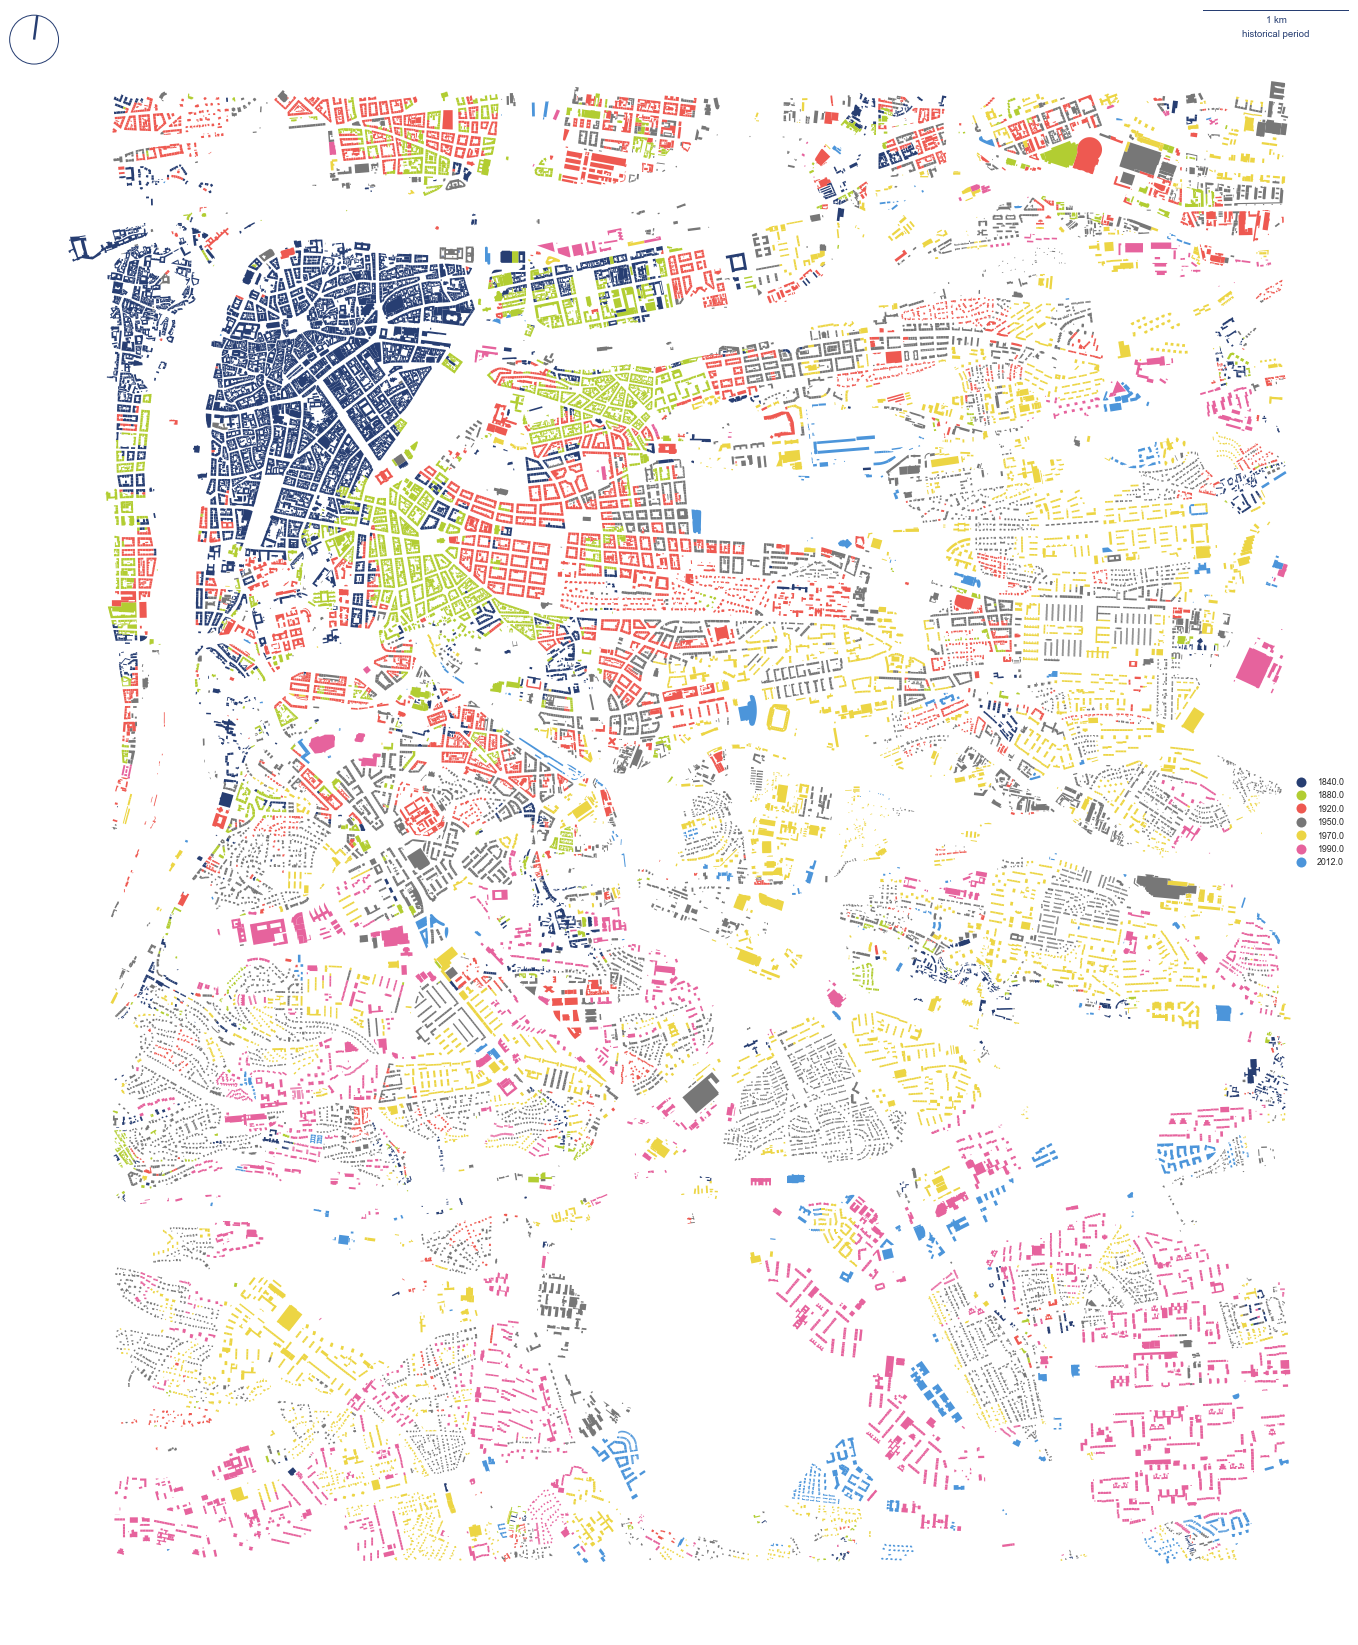

In [216]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
color = (257, 71, 27)  # here for arrow, title, scalebar

# plotting
c = husl.husl_to_hex(*color)

cmap = ListedColormap([husl.husl_to_hex(*color) for color in colors])  

ax = buildings.cx[-744085:-736085, -1051465:-1041465].plot('year', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                   legend_kwds=dict(loc='center right', frameon=False))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='historical period',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_origin_detail.' + ext, bbox_inches='tight')

# analyse

clusters and their origin

In [16]:
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.02
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
color = (257, 71, 27)  # here for arrow, title, scalebar

pal = [husl.husl_to_hex(*color) for color in colors]

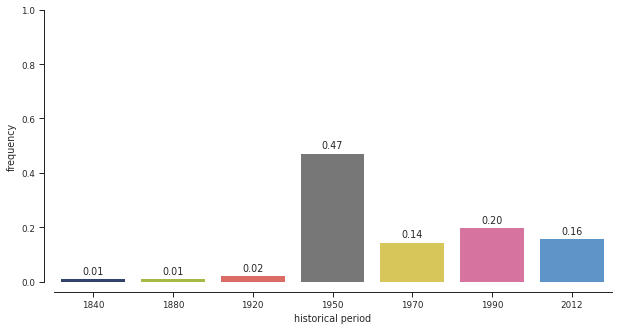

In [18]:
# historical core
data = joined.loc[joined['cluster'].isin([9])]['year'].value_counts(sort=False, normalize=True)

sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
plt.ylabel('frequency')
plt.xlabel('historical period')
plt.ylim(0, 1)
show_values_on_bars(ax)

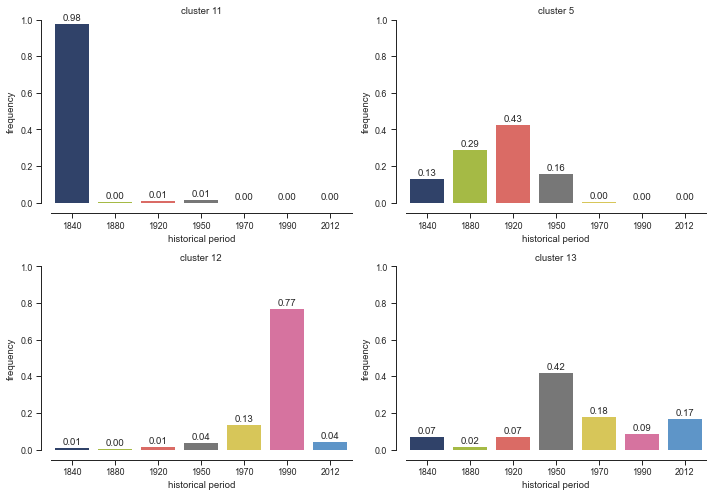

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

data = joined.loc[joined['cluster'].isin([11])]['year'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0, 0], x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
ax[0,0].set_ylabel('frequency')
ax[0,0].set_xlabel('historical period')
ax[0,0].set_title('cluster 11')
ax[0,0].set_ylim(0, 1)
show_values_on_bars(ax[0, 0])

data = joined.loc[joined['cluster'].isin([5])]['year'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0, 1], x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
ax[0,1].set_ylabel('frequency')
ax[0,1].set_xlabel('historical period')
ax[0,1].set_title('cluster 5')
ax[0,1].set_ylim(0, 1)
show_values_on_bars(ax[0, 1])

data = joined.loc[joined['cluster'].isin([12])]['year'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 0], x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
ax[1,0].set_ylabel('frequency')
ax[1,0].set_xlabel('historical period')
ax[1,0].set_title('cluster 12')
ax[1,0].set_ylim(0, 1)
show_values_on_bars(ax[1, 0])

data = joined.loc[joined['cluster'].isin([13])]['year'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 1], x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
ax[1,1].set_ylabel('frequency')
ax[1,1].set_xlabel('historical period')
ax[1,1].set_title('cluster 13')
ax[1,1].set_ylim(0, 1)
show_values_on_bars(ax[1, 1])

plt.tight_layout()
plt.savefig('figures/PRG_cluster_origin_subplot.pdf')

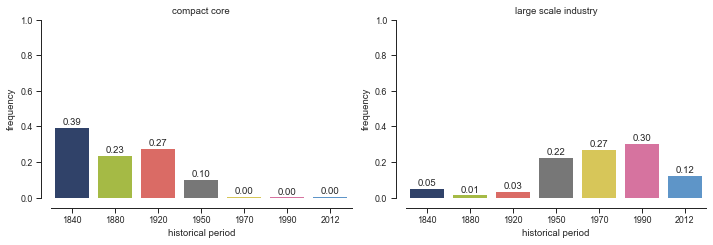

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

data = joined.loc[joined['cluster'].isin([11, 15, 5])]['year'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0], x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
ax[0].set_ylabel('frequency')
ax[0].set_xlabel('historical period')
ax[0].set_title('compact core')
ax[0].set_ylim(0, 1)
show_values_on_bars(ax[0])

data = joined.loc[joined['cluster'].isin([1, 19])]['year'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1], x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('historical period')
ax[1].set_title('large scale industry')
ax[1].set_ylim(0, 1)
show_values_on_bars(ax[1])
plt.tight_layout()

plt.savefig('figures/PRG_branch_origin_subplot.pdf')

In [43]:
# save all clusters
for cl in range(20):
    data = joined.loc[joined['cluster'].isin([cl])]['year'].value_counts(sort=False, normalize=True)

    sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(ax=ax, x=data.index, y=data, order=data.index, palette=pal)
    sns.despine(offset=10)
    plt.ylabel('frequency')
    plt.xlabel('historical period')
    plt.ylim(0, 1)
    show_values_on_bars(ax)
    for ext in ['pdf', 'png']:
        plt.savefig('figures/PRG_cluster_' + str(cl) + '_origin.' + ext, bbox_inches='tight')
    plt.close()

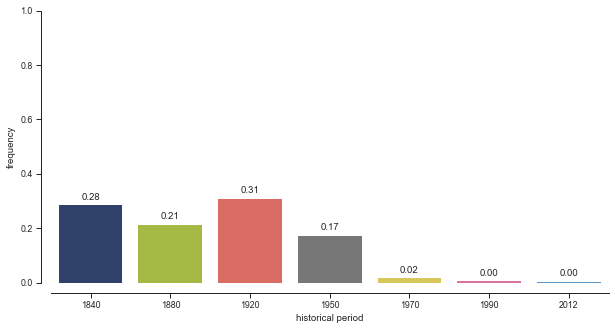

In [45]:
# blocks core
data = joined.loc[joined['cluster'].isin([11, 15, 5, 10])]['year'].value_counts(sort=False, normalize=True)

sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
plt.ylabel('frequency')
plt.xlabel('historical period')
plt.ylim(0, 1)
show_values_on_bars(ax)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_compact_' + str(cl) + '_origin.' + ext, bbox_inches='tight')

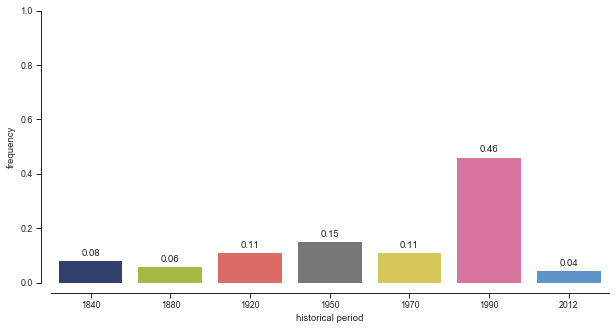

In [49]:
# modern core
data = joined.loc[joined['cluster'].isin([12, 14])]['year'].value_counts(sort=False, normalize=True)

sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
plt.ylabel('frequency')
plt.xlabel('historical period')
plt.ylim(0, 1)
show_values_on_bars(ax)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_modern_' + str(cl) + '_origin.' + ext, bbox_inches='tight')

years and their clusters

In [82]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50), (75, 90, 85), (347, 72, 60), (246, 79, 60)]
cols = []
for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=5)
    for rgb in pal[1:]:
        cols.append(rgb)

symbology = {0: cols[10],
             1: cols[14],
             2: cols[20],
             3: cols[9],
             4: cols[22],
             5: cols[1],
             6: cols[18],
             7: cols[23],
             8: cols[11],
             9: cols[21],
             10: cols[0],
             11: cols[3],
             12: cols[7],
             13: cols[22],
             14: cols[6],
             15: cols[2],
             16: cols[19],
             17: cols[23],
             18: cols[17],
             19: cols[15]}

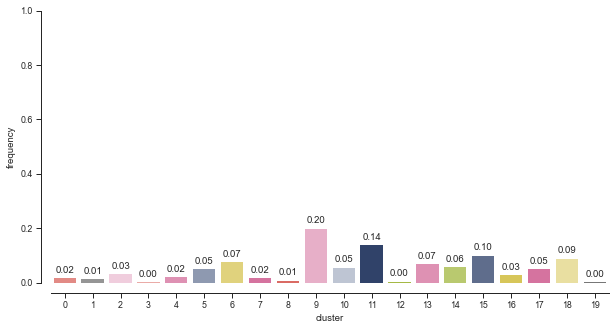

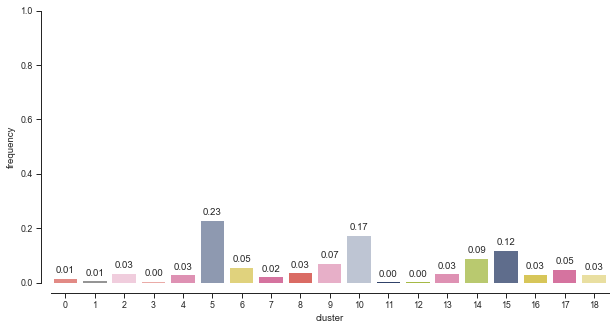

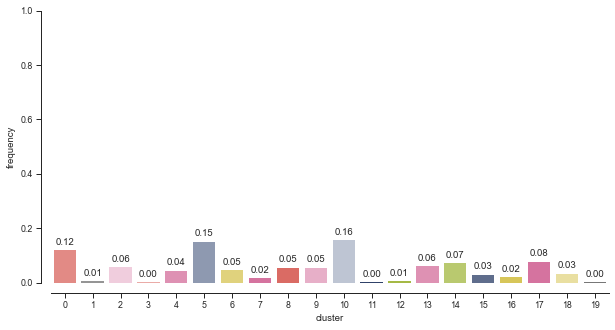

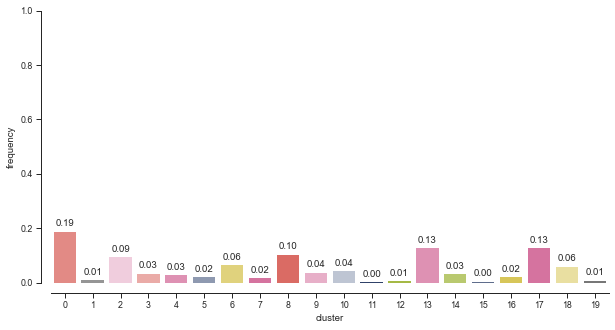

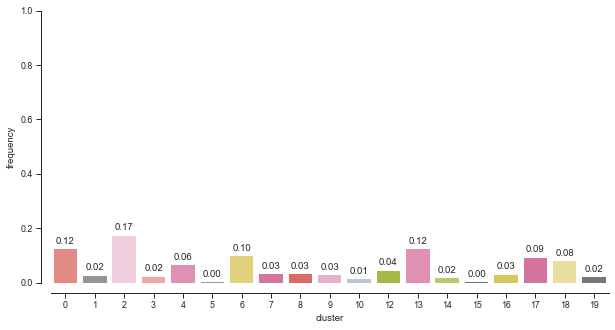

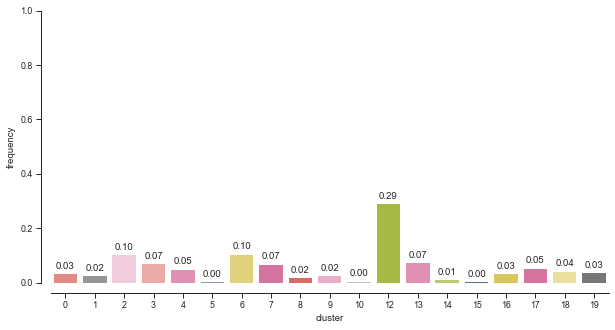

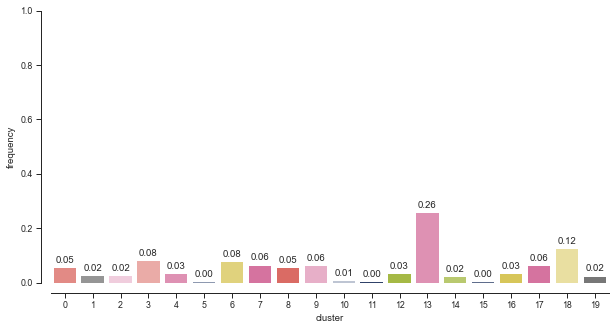

In [100]:
for p in joined.year.cat.categories:

    data = joined[joined.year == p].cluster.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(ax=ax, x=data.index, y=data, palette=symbology)
    sns.despine(offset=10)
    plt.ylim(0, 1)
    plt.ylabel('frequency')
    plt.xlabel('cluster')
    show_values_on_bars(ax)
    for ext in ['pdf', 'png']:
        plt.savefig('figures/PRG_period_' + str(cl) + '.' + ext, bbox_inches='tight')

These have to be interpeted, but some taxa show remarkable link between year of construction and urban pattern. YAY!

In [165]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
color = (257, 71, 27)  # here for arrow, title, scalebar

# plotting
c = husl.husl_to_hex(*color)

for cl in tqdm(range(20), total=20):

    cmap = ListedColormap([husl.husl_to_hex(*color) for color in colors])  
    sub = buildings[buildings.cluster == cl]
    bounds = sub.total_bounds
    ax = sub.plot('year', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                       legend_kwds=dict(loc='center right', frameon=False), zorder=2)
    buildings.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]].plot('year',ax=ax, categorical=True, cmap=cmap,
                    alpha=.2, zorder=1)
    ax.set_axis_off()


    # add scalebar
    scalebar = ScaleBar(dx=1,
                        color=c,
                        location=1,
                        height_fraction=0.001,
                        #fixed_value=1000,
                        label='cluster {} and historical period'.format(cl),
                        label_loc='bottom'
                        )
    ax.add_artist(scalebar)

    # add arrow
    north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
    for ext in ['pdf', 'png']:
        plt.savefig('figures/PRG_cluster_{}_origin_map.'.format(cl) + ext, bbox_inches='tight')
    plt.close()


100%|██████████| 20/20 [25:21<00:00, 76.07s/it]


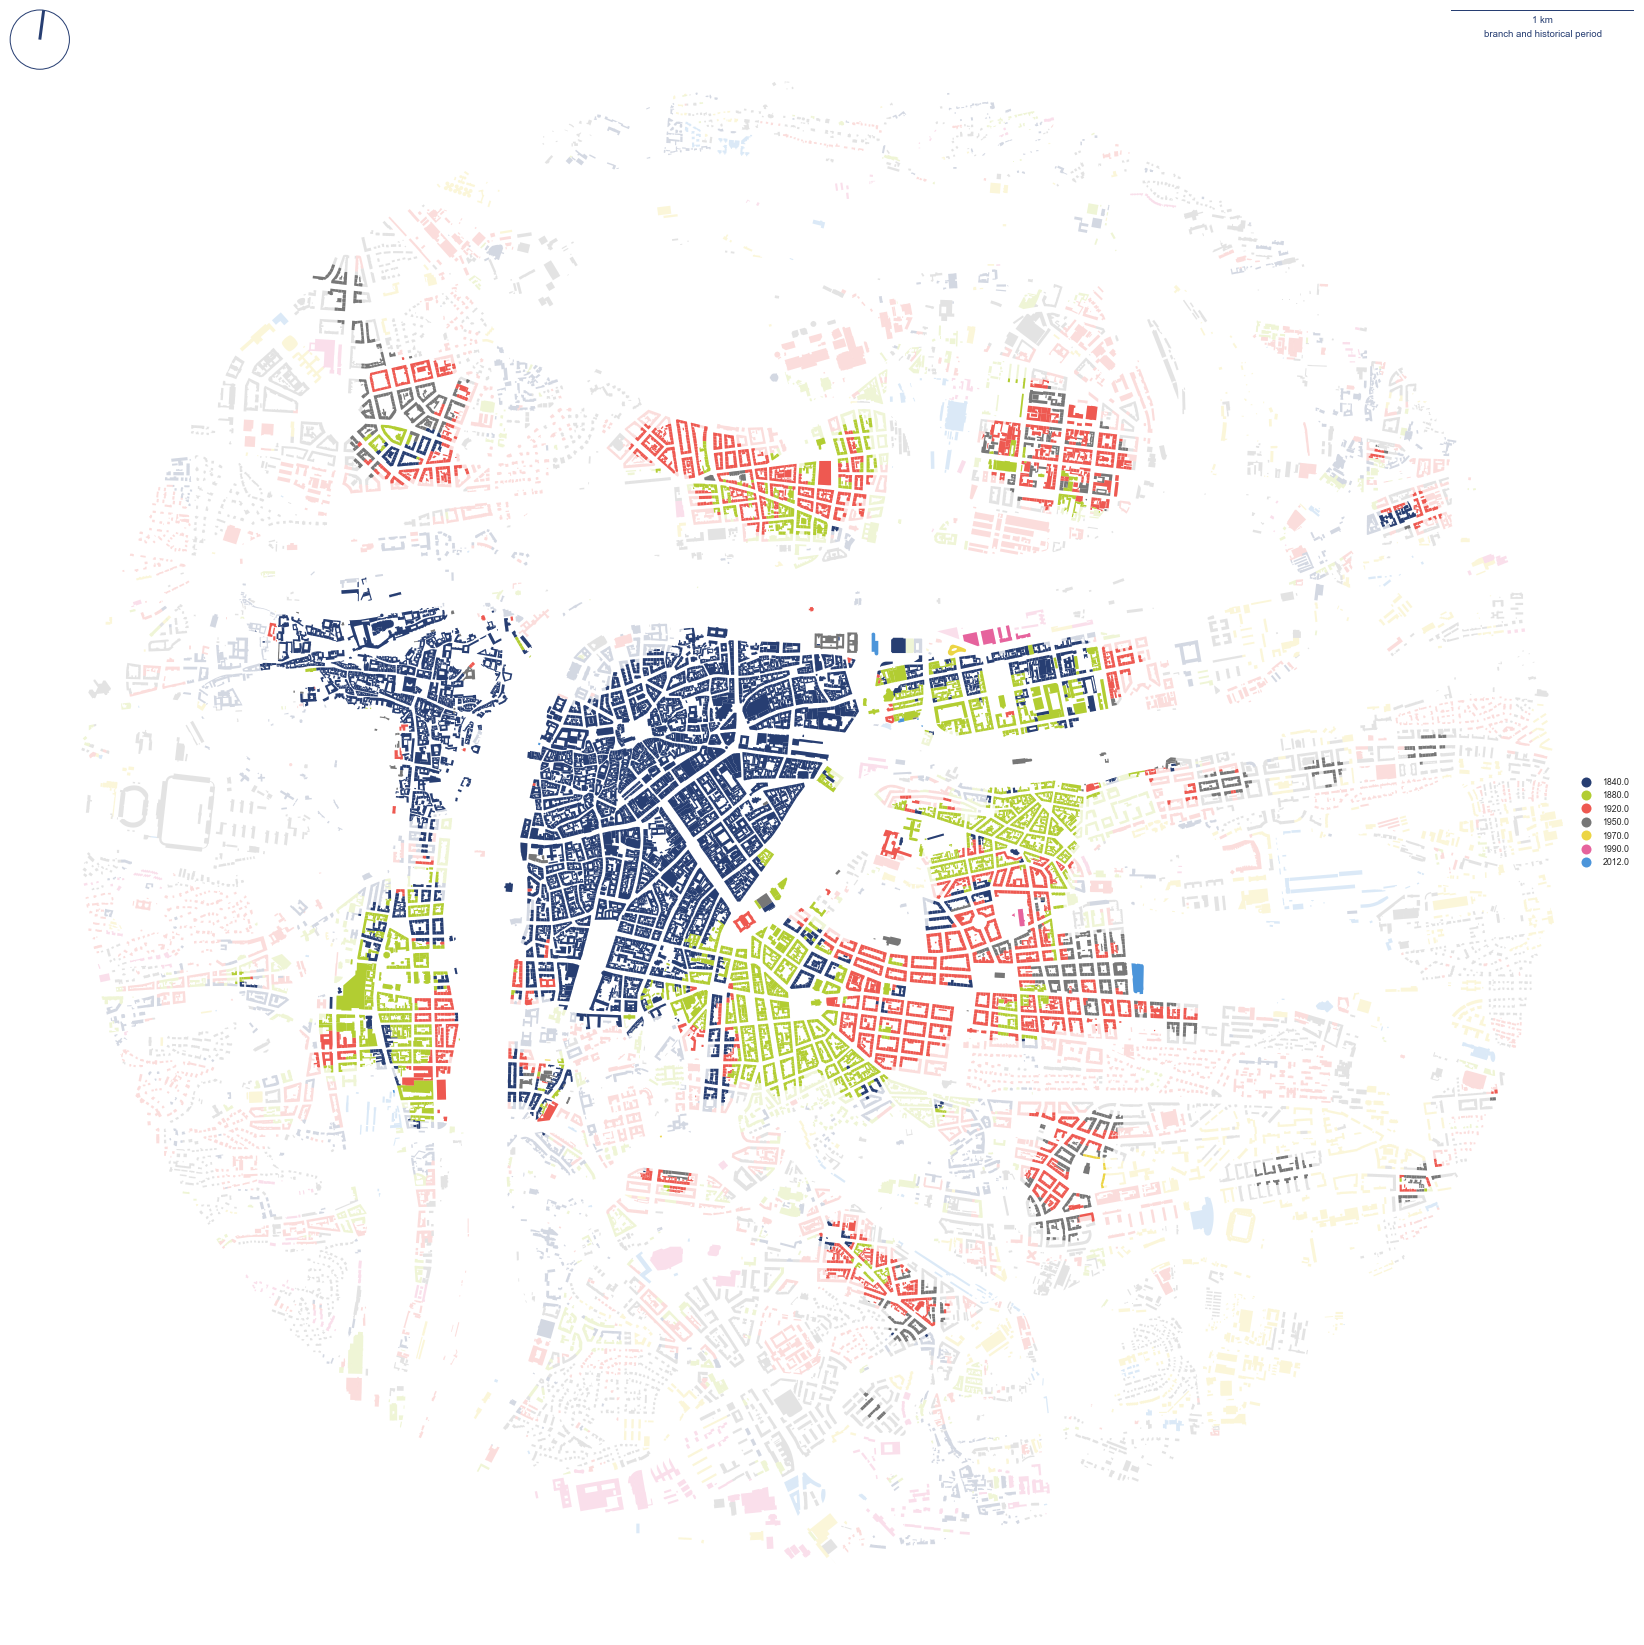

In [13]:
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50),
          (75, 90, 85), (347, 72, 60), (246, 79, 60)]
color = (257, 71, 27)  # here for arrow, title, scalebar

mask = Point(-741862,-1043472).buffer(4000)
gdf = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Prague/Clustering/geometry.gpkg',
                   layer='buildings', mask=mask)
gdf = gdf.merge(joined, on='uID', how='left')

# plotting
c = husl.husl_to_hex(*color)


cmap = ListedColormap([husl.husl_to_hex(*color) for color in colors])  
sub = gdf[gdf.cluster.isin([11, 5, 15])]
ax = sub.plot('year', categorical=True, figsize=(30, 30), cmap=cmap, legend=True,
                   legend_kwds=dict(loc='center right', frameon=False), zorder=2)
gdf.plot('year',ax=ax, categorical=True, cmap=cmap,
                alpha=.2, zorder=1)
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label='branch and historical period',
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, -7.5, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)
for ext in ['pdf', 'png']:
    plt.savefig('figures/PRG_cluster_{}_origin_map_zoom.'.format('compact') + ext, bbox_inches='tight')

In [8]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [9]:
cramers_v(joined.cluster, joined.year)

0.33182788192820617

The resulting value of 0.5 indicates moderate relationship between clustering and historical origin.

#### Chi-square test of independence of variables in a contingency table

In [10]:
confusion_matrix = pd.crosstab(joined.cluster, joined.year)
chi, p, dof, exp = ss.chi2_contingency(confusion_matrix)

In [22]:
p

0.0

In [23]:
dof

54

In [24]:
chi

91599.46109780122

In [25]:
joined.cluster.size

140315

p-value is < 0.001

there is a significant dependency between variables

In [26]:
confusion_matrix = pd.crosstab(joined.cluster, joined.year)

In [11]:
print(confusion_matrix.to_markdown())

|   cluster |   1840 |   1880 |   1920 |   1950 |   1970 |   1990 |   2012 |
|----------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|         0 |    349 |     85 |    263 |   1219 |   1506 |   1442 |    565 |
|         1 |   1138 |    513 |   3588 |  17095 |   4499 |   1265 |   1453 |
|         2 |   1407 |    621 |   1655 |   4537 |   3108 |   2530 |   1357 |
|         3 |   1392 |   1719 |   2658 |   2895 |    678 |    223 |    213 |
|         4 |    145 |     54 |    156 |    888 |   1993 |   6414 |    532 |
|         5 |   3442 |    568 |   1487 |   7677 |   3975 |   2084 |   3459 |
|         6 |   1413 |   2778 |   4109 |   2005 |    150 |      4 |      8 |
|         7 |   3177 |    110 |     73 |     49 |      0 |      0 |      1 |
|         8 |   2834 |    981 |   2661 |   9645 |   4259 |   2629 |    829 |
|         9 |     69 |     63 |    151 |   3764 |   1147 |   1573 |   1244 |
